# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from pyclustertend import hopkins
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [177]:
pd.options.display.max_rows = 140
pd.options.display.max_columns=60

# Ingest Data  

In [178]:
df1=pd.read_excel("World military power.xlsx",header=1)

# EDA

In [179]:
df1.head().T

,0,1,2,3,4
Military Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Military Strength Power Index,1.3444,2.3137,0.4659,0.8379,0.6521
Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Aircraft Strength value,260,19,551,295,227
Fighter/Interceptor Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Fighter/Interceptor Strength value,0,0,103,72,24
Attack Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Attack Aircraft Strength value,25,0,22,18,7
Transport Aircraft Fleet Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Transport Aircraft Fleet Strength value,30,0,59,30,9


## Implement basic steps to see how is your data looks like

In [180]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [181]:
df1[["External Debt","External Debt value"]]

,External Debt,External Debt value
0,Afghanistan,"2,84,00,00,000"
1,Albania,"9,50,50,00,000"
2,Algeria,"6,26,00,00,000"
3,Angola,"42,08,00,00,000"
4,Argentina,"2,14,90,00,00,000"
5,Armenia,"10,41,00,00,000"
6,Australia,"17,14,00,00,00,000"
7,Austria,"6,30,80,00,00,000"
8,Azerbaijan,"17,41,00,00,000"
9,Bahrain,"52,15,00,00,000"


In [182]:
df1

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0
5,Armenia,2.1251,Armenia,64,Armenia,0,Armenia,9,Armenia,3,Armenia,13,Armenia,37,Armenia,20,Armenia,110,Armenia,748,Armenia,38,Armenia,150,Armenia,68,Armen

In [183]:
#df.loc[:, df.columns.str.contains('value')].info()

In [184]:
object_col=df1.select_dtypes("object")

In [185]:
col1=object_col.loc[:, object_col.columns.str.contains('value')]
col1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   defense spending budget value   138 non-null    object
 1   External Debt value             138 non-null    object
 2   Oil Production value            138 non-null    object
 3   Oil Consumption value           138 non-null    object
 4   Proven Oil Reserves value       138 non-null    object
 5   Available Manpower value        138 non-null    object
 6   Total Population value          138 non-null    object
 7   Total Square Land Area value    138 non-null    object
 8   Total Coastline Coverage value  109 non-null    object
 9   Total Waterway Coverage value   138 non-null    object
dtypes: object(10)
memory usage: 10.9+ KB


In [186]:
#col1["Oil Production value"].str.replace(",","").astype(float)#(lambda x: x.replace(",","")).astype(float)

In [187]:
#col1["Total Waterway Coverage value"].map(lambda x: str(x).replace(',','')).astype('float')

In [188]:
for i in col1.columns:
    col1[i]= col1[i].map(lambda x: str(x).replace(',','')).astype('float')
           

In [189]:
col1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   defense spending budget value   138 non-null    float64
 1   External Debt value             138 non-null    float64
 2   Oil Production value            138 non-null    float64
 3   Oil Consumption value           138 non-null    float64
 4   Proven Oil Reserves value       138 non-null    float64
 5   Available Manpower value        138 non-null    float64
 6   Total Population value          138 non-null    float64
 7   Total Square Land Area value    138 non-null    float64
 8   Total Coastline Coverage value  109 non-null    float64
 9   Total Waterway Coverage value   138 non-null    float64
dtypes: float64(10)
memory usage: 10.9 KB


In [190]:
col1

,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value
0,1.200000e+10,2.840000e+09,0.0,5500.0,0.000000e+00,14325743.0,3.494084e+07,652230.0,0.0,1200.0
1,2.500000e+08,9.505000e+09,16000.0,42500.0,1.683000e+08,1519438.0,3.057220e+06,28748.0,362.0,41.0
2,1.300000e+10,6.260000e+09,1306000.0,325000.0,1.220000e+10,20741263.0,4.165749e+07,2381741.0,998.0,0.0
3,7.000000e+09,4.208000e+10,1666000.0,82300.0,8.273000e+09,6244205.0,3.035588e+07,1246700.0,1600.0,1300.0
4,4.200000e+09,2.149000e+11,479400.0,685000.0,2.185000e+09,20179430.0,4.469420e+07,2780400.0,4989.0,11000.0
5,1.385000e+09,1.041000e+10,0.0,47500.0,0.000000e+00,1696085.0,3.038217e+06,29743.0,NaN,0.0
6,2.630000e+10,1.714000e+12,263000.0,1005000.0,1.821000e+09,10808002.0,2.347014e+07,7741220.0,25760.0,2000.0
7,3.380000e+09,6.308000e+11,14260.0,215000.0,4.300000e+07,4017691.0,8.793370e+06,83871.0,NaN,0.0
8,2.805000e+09,1.741000e+10,789300.0,180000.0,7.000000e+09,5042346.0,1.004652e+07,86600.0,713.0,0.0
9,1.415000e+09,5.215000e+10,45000.0,55000.0,1.246000e+08,806505.0,1.422659e+06,760.0,161.0,0.0


## Convert multi index columns to one level

In [191]:
df=df1.select_dtypes("number")
df

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,Total Border Coverage value
0,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,43,5987.0
1,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,4,691.0
2,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,157,6734.0
3,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,176,5369.0
4,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,1138,11968.0
5,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,NaN,NaN,NaN,NaN,11,1570.0
6,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,480,NaN
7,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,NaN,NaN,NaN,NaN,52,2524.0
8,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31.0,0.0,4.0,0.0,1.0,37,2468.0
9,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39.0,0.0,0.0,0.0,1.0,4,NaN


In [192]:
df1.iloc[:,0]

0                           Afghanistan
1                               Albania
2                               Algeria
3                                Angola
4                             Argentina
5                               Armenia
6                             Australia
7                               Austria
8                            Azerbaijan
9                               Bahrain
10                           Bangladesh
11                              Belarus
12                              Belgium
13                               Bhutan
14                              Bolivia
15               Bosnia and Herzegovina
16                             Botswana
17                               Brazil
18                             Bulgaria
19                         Burkina Faso
20                             Cambodia
21                             Cameroon
22                               Canada
23             Central African Republic
24                                 Chad


In [193]:
df=pd.concat([df1.iloc[:,0],df,col1],axis=1).rename(columns={"Military Strength":"Country"})

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

## Detect and drop duplicated columns

In [195]:
df.duplicated().sum()

0

## Check for missing values 

In [196]:
df.isnull().sum()

Country                                     0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
Airport Totals value                        0
Total Border Coverage value                 9
defense spending budget value     

In [197]:
df.Country[df["Navy Fleet Strengths value"].isnull()]

16                    Botswana
19                Burkina Faso
23    Central African Republic
24                        Chad
30                     Czechia
38                    Ethiopia
48                     Hungary
62                  Kyrgyzstan
71                        Mali
74                     Moldova
75                    Mongolia
81                       Nepal
85                       Niger
88             North Macedonia
Name: Country, dtype: object

In [198]:
df.Country[df["Aircraft Carrier Fleet Strength value"].isnull()]

5                       Armenia
7                       Austria
11                      Belarus
13                       Bhutan
16                     Botswana
19                 Burkina Faso
23     Central African Republic
24                         Chad
30                      Czechia
38                     Ethiopia
48                      Hungary
62                   Kyrgyzstan
71                         Mali
74                      Moldova
75                     Mongolia
81                        Nepal
85                        Niger
88              North Macedonia
106                    Slovakia
110                 South Korea
117                 Switzerland
120                  Tajikistan
132                  Uzbekistan
Name: Country, dtype: object

In [199]:
df.Country[df["Total Border Coverage value"].isnull()]

6        Australia
9          Bahrain
57           Japan
69      Madagascar
83     New Zealand
95     Philippines
105      Singapore
113      Sri Lanka
119         Taiwan
Name: Country, dtype: object

In [200]:
df[["Country","Navy Fleet Strengths value"]].sort_values(by="Navy Fleet Strengths value",ascending=False)

,Country,Navy Fleet Strengths value
87,North Korea,984.0
26,China,777.0
101,Russia,603.0
130,United States,490.0
27,Colombia,453.0
51,Iran,398.0
35,Egypt,316.0
122,Thailand,292.0
49,India,285.0
50,Indonesia,282.0


https://www.globalfirepower.com/navy-ships.php according to this site, the null value all are 0

In [201]:
df.fillna(0,inplace=True)

In [202]:
df.isnull().sum()

Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
Airport Totals value                       0
Total Border Coverage value                0
defense spending budget value              0
External D

## Fix the dtypes

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [204]:
df.drop(["Total Border Coverage value","Total Square Land Area value","Total Coastline Coverage value","Total Waterway Coverage value"],axis=1,inplace=True)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

## Visualy inspect the some features

<AxesSubplot:>

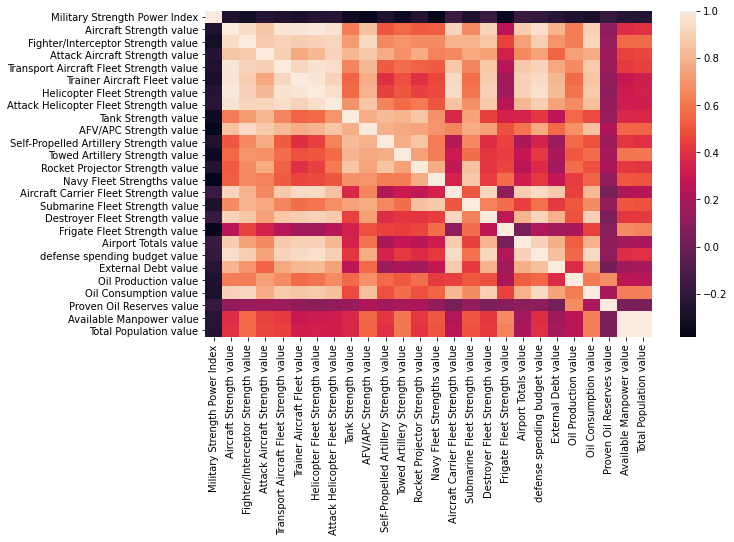

In [206]:
sns.heatmap(df.corr())

KeyboardInterrupt: 

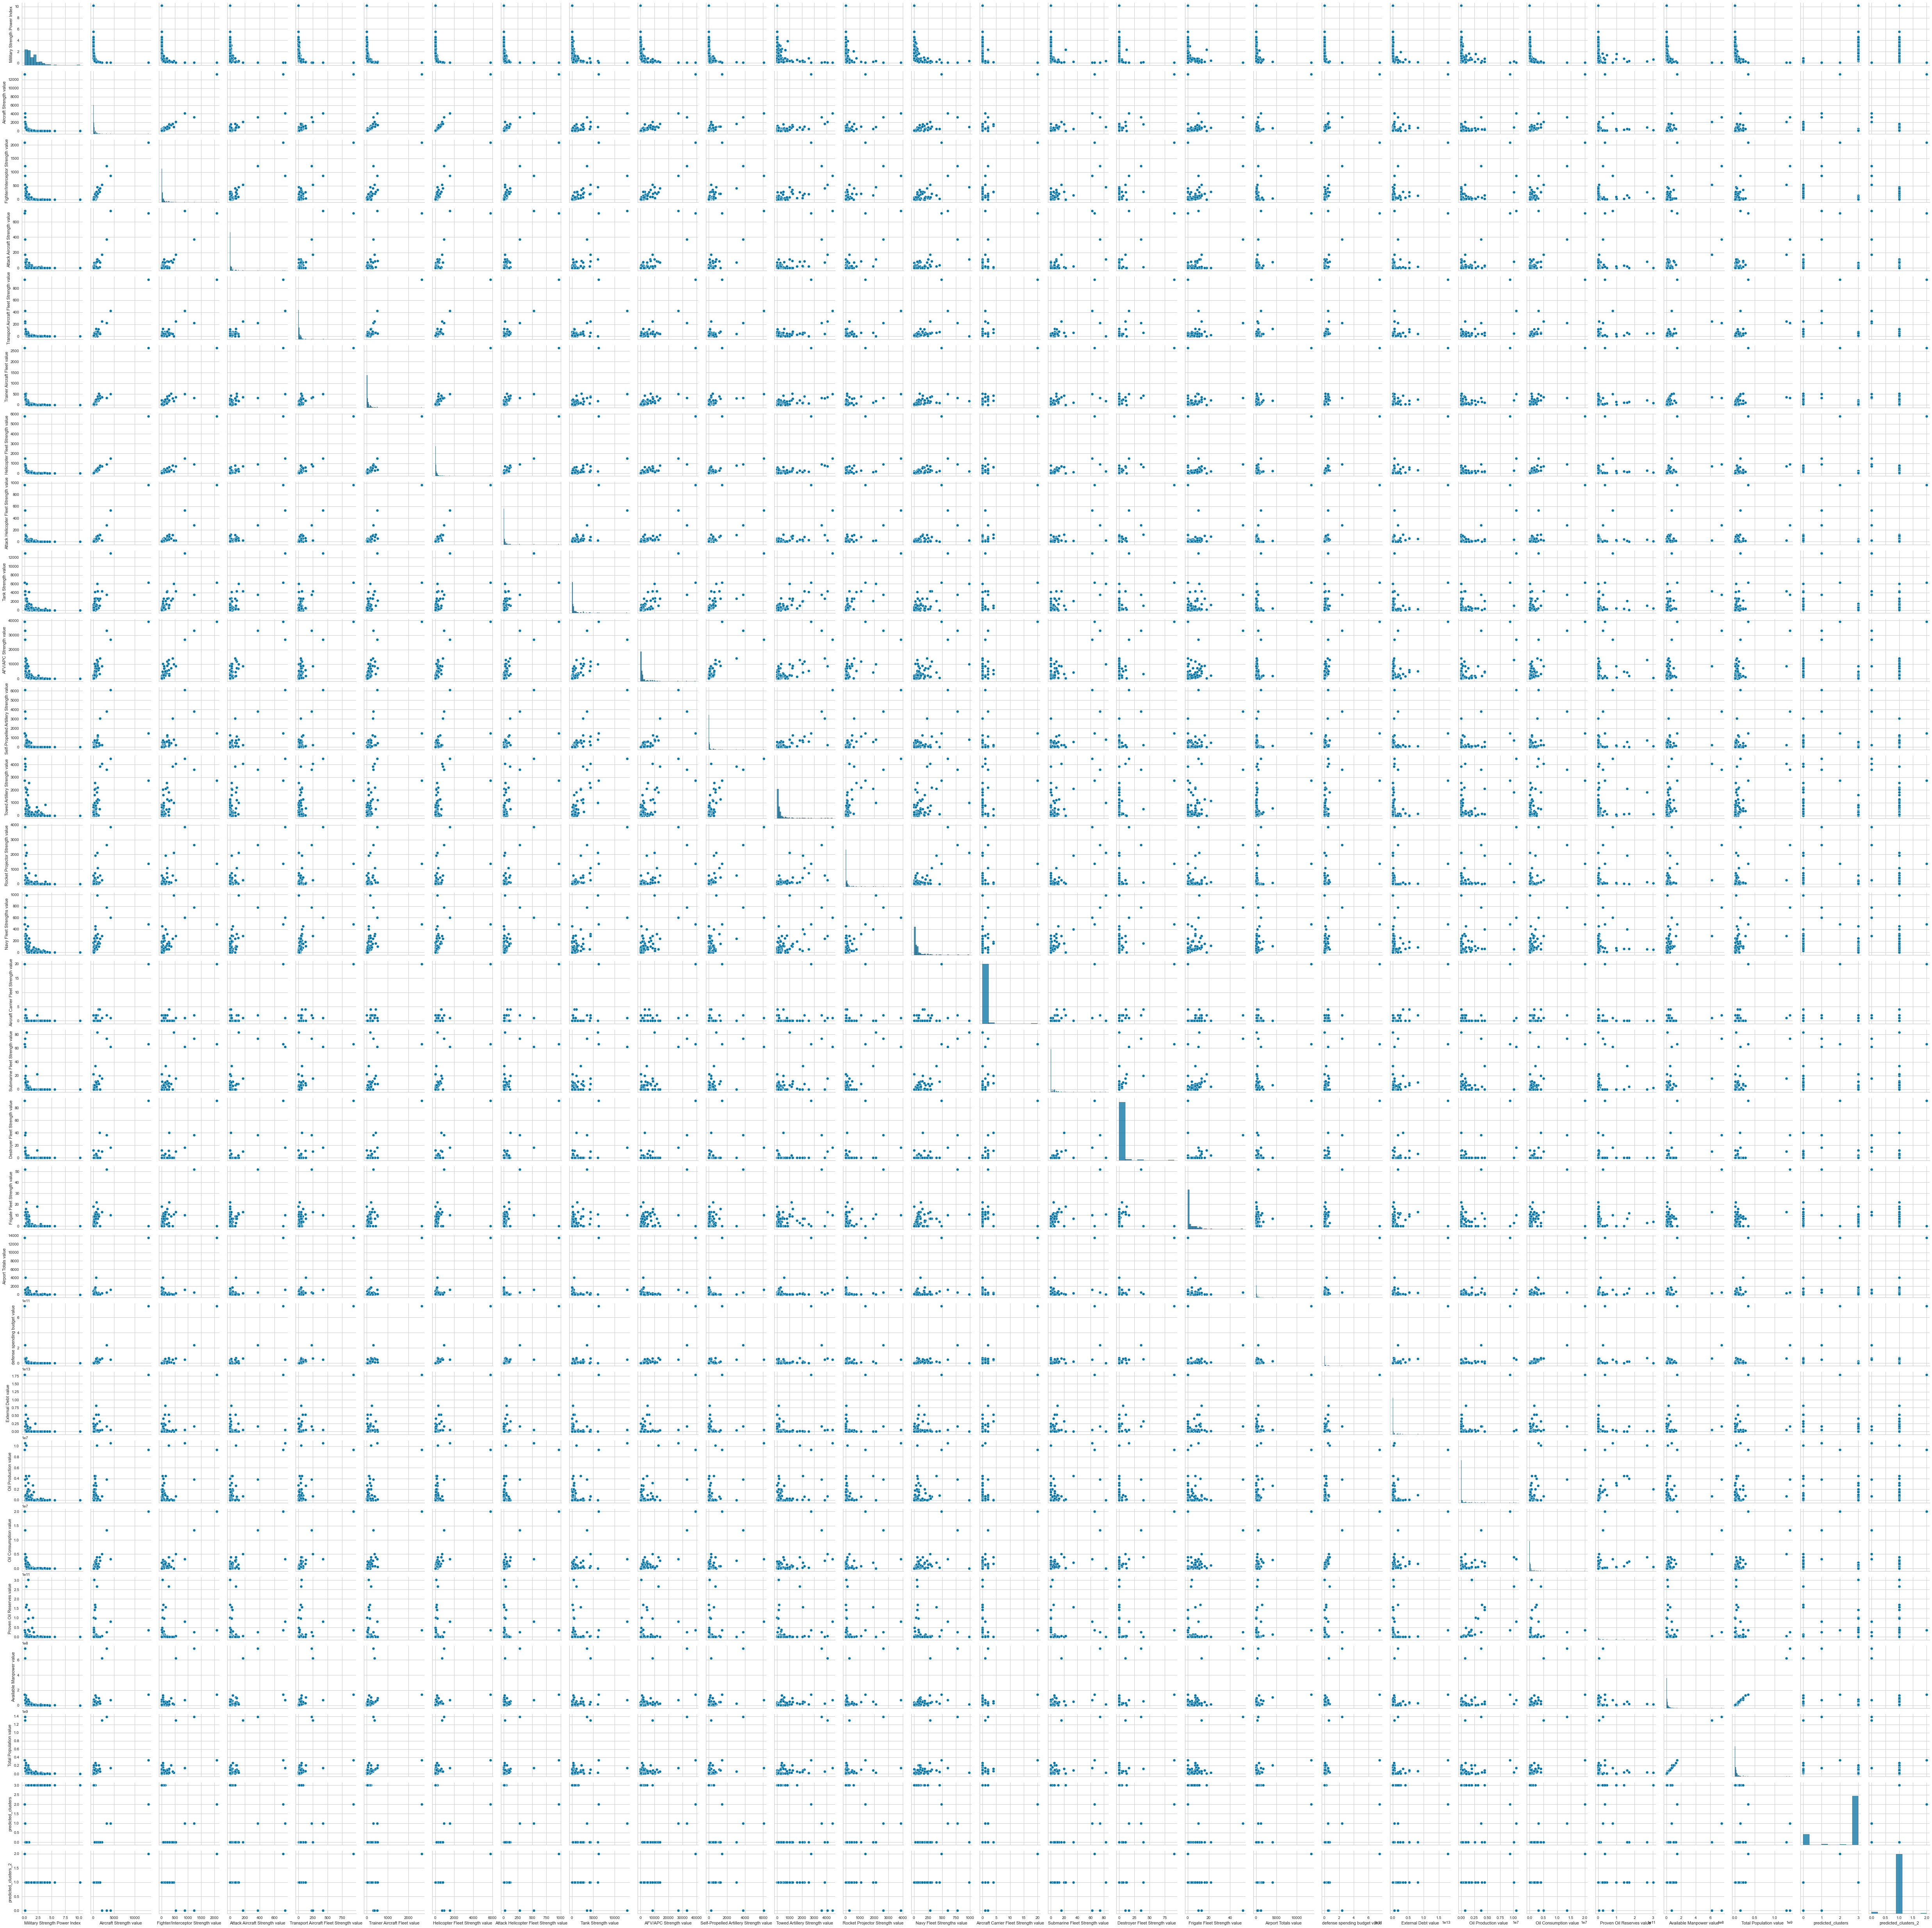

## Decriptive statistics

In [207]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,76.362319,0.318841,4.000000,1.710145,2.934783,290.043478,1.399363e+10,5.194983e+11,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,140.821984,1.804235,12.631787,9.154954,6.057157,1212.967393,6.731189e+10,1.847252e+12,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.300000e+07,5.394000e+08,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,5.250000,0.000000,0.000000,0.000000,0.000000,33.500000,3.255000e+08,9.361500e+09,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,30.000000,0.000000,0.000000,0.000000,0.000000,68.000000,2.100909e+09,3.997000e+10,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,72.750000,0.000000,2.000000,0.000000,4.000000,150.750000,6.957750e+09,1.830250e+11,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,13513.000000,7.500000e+11,1.791000e+13,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09


# Data Preprocessing

In [279]:
X=df.drop(["Country","Total Population value"],axis=1)

In [280]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Modelling

In [281]:
hopkins(X,X.shape[0])

0.0693143312522211

In [282]:
hopkins(X_scaled,X_scaled.shape[0])

0.07496236147264194

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [283]:
ssd = []
ssd_scale=[]
K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
    model.fit(X_scaled)
    ssd_scale.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

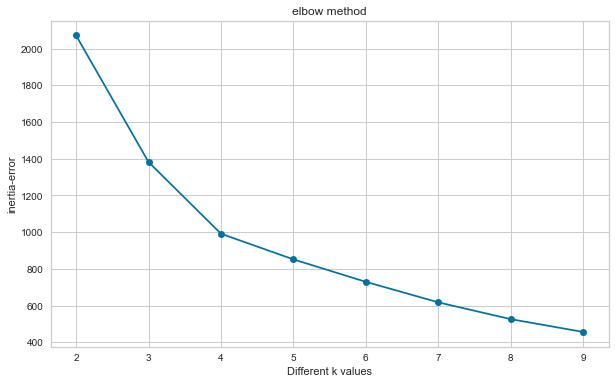

In [284]:
#plt.plot(K, ssd, c='r')
plt.plot(K, ssd_scale, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

Text(0.5, 1.0, 'elbow method')

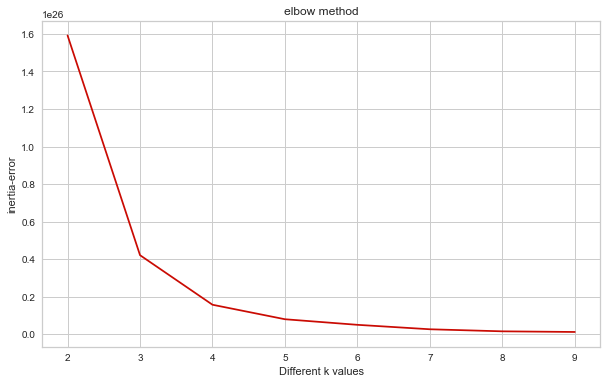

In [285]:
plt.plot(K, ssd, c='r')
#plt.plot(K, ssd_scale, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [286]:
pd.Series(ssd_scale).diff()

0           NaN
1   -689.494198
2   -390.558091
3   -139.814719
4   -122.355425
5   -111.697352
6    -91.593443
7    -69.642606
dtype: float64

In [287]:
df_diff =pd.DataFrame([-pd.Series(ssd).diff(),-pd.Series(ssd_scale).diff()],index = ["ssd","ssd_scale"])


<AxesSubplot:title={'center':'ssd_scale'}>

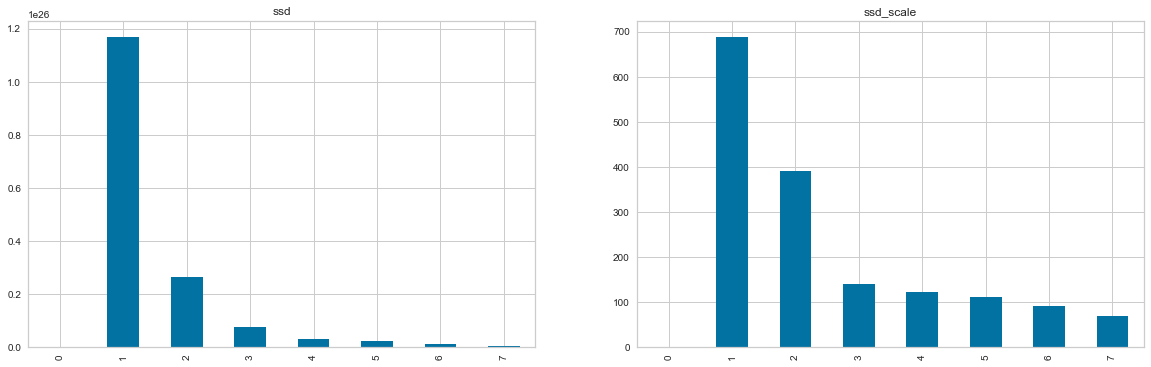

In [288]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("ssd")
df_diff.T.iloc[:,0].plot(kind="bar")

plt.subplot(122)
plt.title("ssd_scale")
df_diff.T.iloc[:,1].plot(kind="bar")

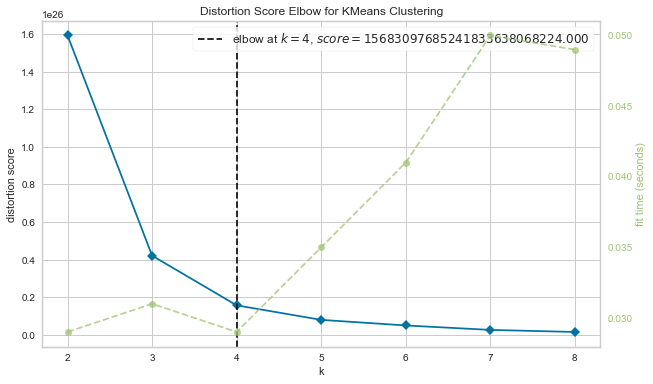

In [289]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

Lets Continue with X_scale and n_cluster=4

In [290]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)  ## düşük inertia yüsek silhoutte score istenen
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg},the inertia is : {kmeans.inertia_}")

For n_clusters=2, the silhouette score is 0.8678804190632277,the inertia is : 2071.5537610358824
For n_clusters=3, the silhouette score is 0.37023178731795425,the inertia is : 1382.0595631331887
For n_clusters=4, the silhouette score is 0.436873893755667,the inertia is : 991.501472521745
For n_clusters=5, the silhouette score is 0.22476218572120624,the inertia is : 851.6867537750708
For n_clusters=6, the silhouette score is 0.1980391130793721,the inertia is : 729.3313289079586
For n_clusters=7, the silhouette score is 0.17060581099079136,the inertia is : 617.6339773788449
For n_clusters=8, the silhouette score is -0.5412718475183299,the inertia is : 526.040534035144


### Model Building and label visualisation

In [291]:
model = KMeans(n_clusters =4,random_state=101)
model.fit_predict(X_scaled)

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 2, 0, 0, 0])

In [292]:
clusters = model.labels_

In [293]:
df["predicted_clusters"] = clusters

### Evaluate 

In [294]:
df.Country[df["predicted_clusters"]==2]

2             Algeria
17             Brazil
22             Canada
35              Egypt
40             France
43            Germany
45             Greece
49              India
50          Indonesia
51               Iran
54             Israel
55              Italy
57              Japan
87        North Korea
91           Pakistan
102      Saudi Arabia
110       South Korea
118             Syria
119            Taiwan
122          Thailand
124            Turkey
127           Ukraine
129    United Kingdom
134           Vietnam
Name: Country, dtype: object

## Hierarchical Clustering

In [295]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

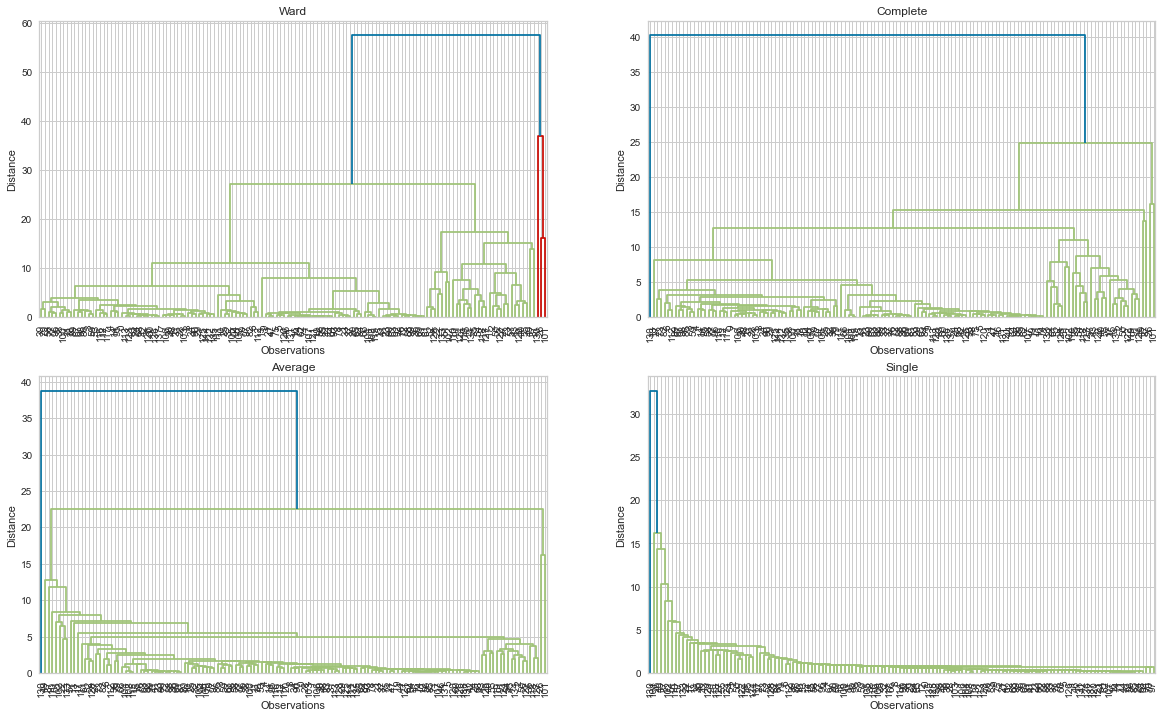

In [296]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

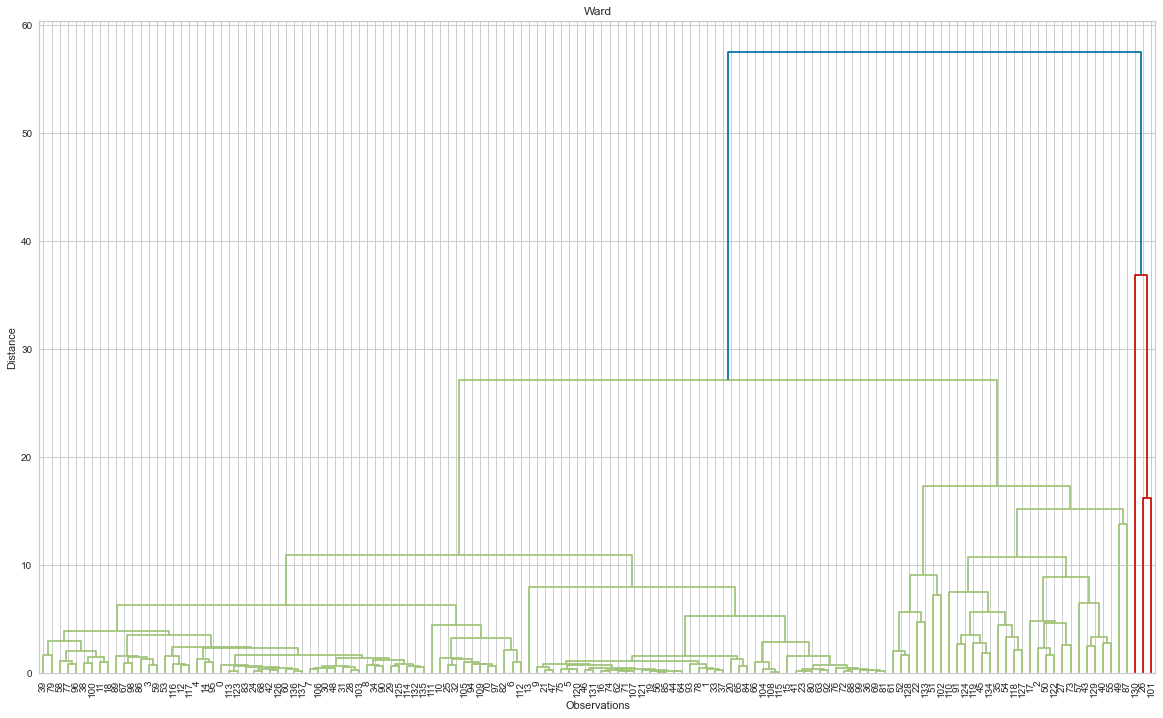

In [297]:
plt.figure(figsize = (20,12))
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

In [298]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.8678804190632277
Silhouette Score for 3 clusters: 0.4524165681621288
Silhouette Score for 4 clusters: 0.384374720588681
Silhouette Score for 5 clusters: 0.19734279892084458
Silhouette Score for 6 clusters: 0.13362988251502056
Silhouette Score for 7 clusters: -0.07217500127800464
Silhouette Score for 8 clusters: -0.773247771857706
Silhouette Score for 9 clusters: -0.6389447470531578


### Model Building and label visualisation

In [304]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X_scaled)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 2, 3,
       3, 0, 0, 3, 3, 3], dtype=int64)

### Evaluate 

In [305]:
df["predicted_clusters_2"] = model1.labels_

In [301]:
df[["predicted_clusters_2","predicted_clusters"]]

,predicted_clusters_2,predicted_clusters
0,0,0
1,0,0
2,0,2
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [306]:
df[["predicted_clusters_2"]].value_counts()

predicted_clusters_2
3                       105
0                        30
1                         2
2                         1
dtype: int64

In [303]:
df[["predicted_clusters"]].value_counts()

predicted_clusters
0                     111
2                      24
3                       2
1                       1
dtype: int64